# EDA

In [1]:
import pandas as pd
import numpy as np

## General datasets information

In [2]:
recipes = pd.read_csv('../data/RAW_recipes.csv')
reviews = pd.read_csv('../data/RAW_interactions.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/RAW_recipes.csv'

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [16]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   recipe_id       231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [171]:
recipes.isna().sum()

name                 1
recipe_id            0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [172]:
reviews.isna().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

In [175]:
recipes.duplicated().sum(), reviews.duplicated().sum()

(0, 0)

In [177]:
recipes[recipes['name'].isna() == True] # https://www.food.com/recipe/-368257

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,NaN,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


In [178]:
recipes['name'] = recipes['name'].fillna('lemon salad dressing')

Dataset is pretty clean, with no duplicates.
Few descriptions and reviews missing.

To be adressed if still true when filtered


# Exploring the ratings for rate prediction

## Merging the reviews to their recipes

In [5]:
recipes.rename(columns={'id': 'recipe_id'}, inplace=True)

In [6]:
recipes[recipes['recipe_id']==59]

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
125625,lou s fabulous bruschetta,59,40,1578,1999-09-13,"['60-minutes-or-less', 'time-to-make', 'course...","[221.5, 10.0, 7.0, 15.0, 16.0, 12.0, 10.0]",7,"['cut baguette into slices', 'butter and then ...",this one is different!,"['french baguette', 'butter', 'garlic powder',...",9


In [7]:
merged = reviews.merge(recipes, how='inner', on='recipe_id')
merged.head(2)

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9


 ## Distribution of ratings


In [8]:
round(reviews['rating'].value_counts(normalize=True)*100,2)

rating
5    72.09
4    16.55
0     5.37
3     3.61
2     1.25
1     1.13
Name: proportion, dtype: float64

<Axes: >

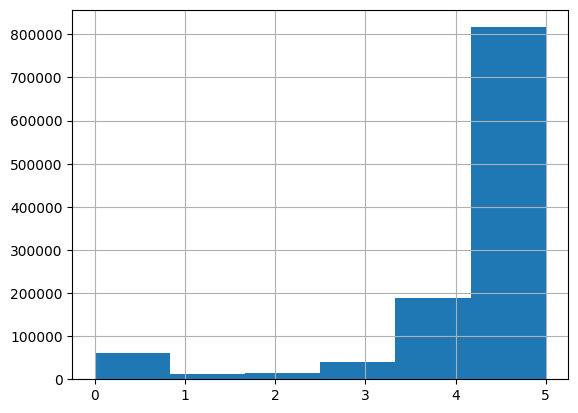

In [9]:
reviews['rating'].hist(bins=6)

Very high scew toward highest rates

Could be explained by culture with American being more enthousiastic than French

Can also be explained by recipe virality. The better the recipe, the most share and exposure for SEO it gets. Then the more views and positive reviews it receives. 

### grouping by recipes

In [10]:
grouped = merged.groupby(['recipe_id']).agg(
                                mean_rating=('rating', 'mean'),
                                review_count=('rating', 'count')
                                )

In [11]:
print('recipes : '+ str(len(recipes))+ ', of which recipes with review : ' + str(len(grouped)) + '(' + str(len(grouped)/len(recipes)*100) + '%)')
print('reviews : '+ str(len(reviews)))

recipes : 231637, of which recipes with review : 231637(100.0%)
reviews : 1132367


<Axes: >

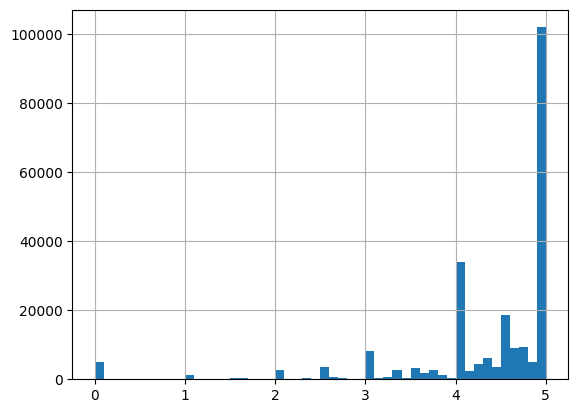

In [12]:
grouped['mean_rating'].hist(bins=50)

In [13]:
grouped['rounded'] = round(grouped['mean_rating'],0)

In [14]:
grouped['rounded'].value_counts(normalize=True)

rounded
5.0    0.561564
4.0    0.320510
3.0    0.056947
2.0    0.031834
0.0    0.022384
1.0    0.006761
Name: proportion, dtype: float64

### Excluding the recipes with not enough reviews

In [22]:
number_review_threshold = 9

In [23]:
review_filter = grouped[grouped['review_count']> number_review_threshold]
len(review_filter)

21399

<Axes: >

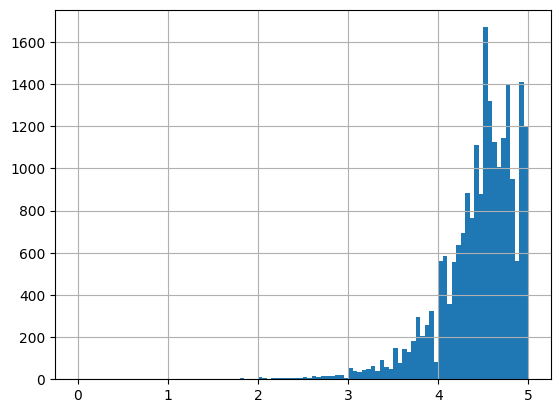

In [24]:
review_filter['mean_rating'].hist(bins=100)

distribution of their number of reviews

<Axes: >

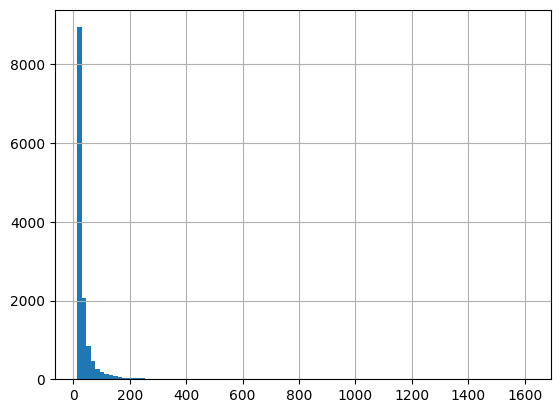

In [206]:
review_filter['review_count'].hist(bins=100)

### Text features lenght

<Axes: ylabel='Frequency'>

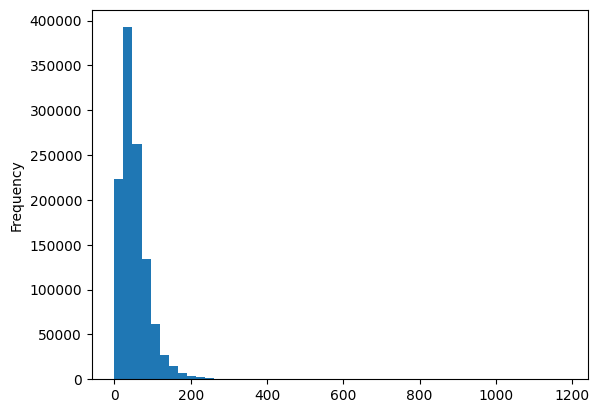

In [210]:
# review lenght
reviews['review'].apply(lambda x: len(str(x).split())).plot(kind='hist', bins=50)

<Axes: >

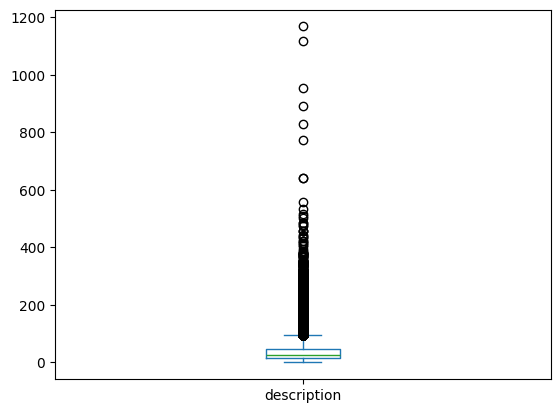

In [212]:
# description lenght
recipes['description'].apply(lambda x: len(str(x).split())).plot(kind='box')

In [228]:
test = recipes.head()

In [5]:
from recettes_et_sentiments.api_model.rs_data import load_recipes

recipes = load_recipes('data/RAW_recipes.csv')

In [6]:
tags = recipes['tags']
tags

id
137739    [60-minutes-or-less, time-to-make, course, mai...
31490     [30-minutes-or-less, time-to-make, course, mai...
112140    [time-to-make, course, preparation, main-dish,...
59389     [60-minutes-or-less, time-to-make, course, mai...
44061     [weeknight, time-to-make, course, main-ingredi...
                                ...                        
486161    [ham, 60-minutes-or-less, time-to-make, course...
493372    [15-minutes-or-less, time-to-make, course, pre...
308080    [60-minutes-or-less, time-to-make, course, mai...
298512    [30-minutes-or-less, time-to-make, course, pre...
298509    [30-minutes-or-less, time-to-make, course, pre...
Name: tags, Length: 231637, dtype: object

In [11]:
list_tag = []

for row in tags:
    for tag in row:
        list_tag.append(tag)

len(list_tag)

4141688

In [13]:
unique_tags = set(list_tag)

In [22]:
count_tag = []
for tag in unique_tags:
    count_tag.append(list_tag.count(tag))

In [24]:
df_tag = pd.DataFrame({'tag':list(unique_tags), 'count':count_tag})

In [33]:
df_tag.sort_values('count', ascending=False).head(55)

,tag,count
348,preparation,230546
414,time-to-make,225326
521,course,218148
232,main-ingredient,170446
208,dietary,165091
346,easy,126062
341,occasion,114145
366,cuisine,91165
391,low-in-something,85776
143,main-dish,71786
